In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# In the next cell, add the following code that 
# we used to generate the random latitudes. Also, 
# we'll create a similar code snippet that will 
# generate longitudes. To ensure enough latitudes 
# and longitudes, we'll start with 1,500. In 
# addition, we'll pack the latitudes (lats) and 
# longitudes (lngs) as pairs by zipping them 
# (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# You can only unzip a zipped tuple once before it is 
# removed from the computer's memory. Make sure you 
# unzip the latitudes and longitudes into the 
# coordinates list before moving on.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [8]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=abb9d2237b6ae29027e3e0f77f22c151


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | najran
Processing Record 2 of Set 1 | verkh-usugli
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | puttur
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | chaumont
Processing Record 10 of Set 1 | tessalit
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | amahai
Processing Record 13 of Set 1 | yagodnoye
Processing Record 14 of Set 1 | pietarsaari
Processing Record 15 of Set 1 | leua
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | pathein
Processing Record 22 of Set 1 | havelock
Processing Record 23 of Set 1 | guerre

Processing Record 43 of Set 4 | bud
Processing Record 44 of Set 4 | perris
Processing Record 45 of Set 4 | hokitika
Processing Record 46 of Set 4 | pandan niog
Processing Record 47 of Set 4 | calamar
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | dunedin
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | pochutla
Processing Record 3 of Set 5 | xai-xai
Processing Record 4 of Set 5 | mosquera
Processing Record 5 of Set 5 | whitehorse
Processing Record 6 of Set 5 | saint-jean-de-maurienne
Processing Record 7 of Set 5 | hermitage
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 11 of Set 5 | warqla
City not found. Skipping...
Processing Record 12 of Set 5 | palaikastron
Processing Record 13 of Set 5 | tocopilla
Processing Record 14 of Set 5 | yukon
Proce

Processing Record 31 of Set 8 | shkotovo-22
City not found. Skipping...
Processing Record 32 of Set 8 | hue
Processing Record 33 of Set 8 | anadyr
Processing Record 34 of Set 8 | hay river
Processing Record 35 of Set 8 | paamiut
Processing Record 36 of Set 8 | alekseyevsk
Processing Record 37 of Set 8 | acuna
City not found. Skipping...
Processing Record 38 of Set 8 | garowe
Processing Record 39 of Set 8 | dokka
Processing Record 40 of Set 8 | napanee
Processing Record 41 of Set 8 | moose factory
Processing Record 42 of Set 8 | labuhan
Processing Record 43 of Set 8 | wewak
Processing Record 44 of Set 8 | nome
Processing Record 45 of Set 8 | katherine
Processing Record 46 of Set 8 | clyde river
Processing Record 47 of Set 8 | oussouye
Processing Record 48 of Set 8 | lodja
Processing Record 49 of Set 8 | houston
Processing Record 50 of Set 8 | cidreira
Processing Record 1 of Set 9 | sibenik
Processing Record 2 of Set 9 | roma
Processing Record 3 of Set 9 | haines junction
Processing Reco

Processing Record 14 of Set 12 | ptuj
Processing Record 15 of Set 12 | sulangan
Processing Record 16 of Set 12 | kabo
Processing Record 17 of Set 12 | lakes entrance
Processing Record 18 of Set 12 | loiza
Processing Record 19 of Set 12 | wanning
Processing Record 20 of Set 12 | amazar
Processing Record 21 of Set 12 | kovdor
Processing Record 22 of Set 12 | krasnouralsk
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | saleaula
City not found. Skipping...
Processing Record 25 of Set 12 | nautla
Processing Record 26 of Set 12 | ponta delgada
Processing Record 27 of Set 12 | aparecida do taboado
Processing Record 28 of Set 12 | barawe
City not found. Skipping...
Processing Record 29 of Set 12 | vacaria
Processing Record 30 of Set 12 | mazara del vallo
Processing Record 31 of Set 12 | ulladulla
Processing Record 32 of Set 12 | veraval
Processing Record 33 of Set 12 | adrar
Processing Record 34 of Set 12 | chapada dos guimaraes
Processing Record 35 of Set 12 | sald

In [10]:
len(city_data)

556

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Najran,17.4924,44.1277,89.60,18,74,6.91,SA,2021-04-15 16:29:55
1,Verkh-Usugli,52.7000,115.1667,26.42,62,97,4.56,RU,2021-04-15 16:29:56
2,Saint-Philippe,-21.3585,55.7679,77.00,83,0,3.44,RE,2021-04-15 16:29:56
3,Puttur,12.7667,75.2167,82.40,74,20,4.61,IN,2021-04-15 16:29:56
4,Port Alfred,-33.5906,26.8910,69.85,66,100,25.26,ZA,2021-04-15 16:29:56
5,Jamestown,42.0970,-79.2353,42.01,65,90,10.36,US,2021-04-15 16:29:57
6,Rikitea,-23.1203,-134.9692,77.50,75,85,7.96,PF,2021-04-15 16:29:57
7,Punta Arenas,-53.1500,-70.9167,50.00,66,75,12.66,CL,2021-04-15 16:29:57
8,Chaumont,48.1167,5.1333,50.00,41,90,3.00,FR,2021-04-15 16:29:58
9,Tessalit,20.1986,1.0114,103.71,4,2,15.05,ML,2021-04-15 16:29:58


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Najran,SA,2021-04-15 16:29:55,17.4924,44.1277,89.60,18,74,6.91
1,Verkh-Usugli,RU,2021-04-15 16:29:56,52.7000,115.1667,26.42,62,97,4.56
2,Saint-Philippe,RE,2021-04-15 16:29:56,-21.3585,55.7679,77.00,83,0,3.44
3,Puttur,IN,2021-04-15 16:29:56,12.7667,75.2167,82.40,74,20,4.61
4,Port Alfred,ZA,2021-04-15 16:29:56,-33.5906,26.8910,69.85,66,100,25.26
...,...,...,...,...,...,...,...,...,...
551,Chiman,PK,2021-04-15 16:32:46,32.5463,73.8138,75.20,41,40,4.29
552,Taldan,RU,2021-04-15 16:32:47,53.6667,124.8000,18.68,91,99,3.53
553,Fort Nelson,CA,2021-04-15 16:30:00,58.8053,-122.7002,41.00,56,75,5.75
554,Isangel,VU,2021-04-15 16:32:47,-19.5500,169.2667,78.37,84,29,3.85


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

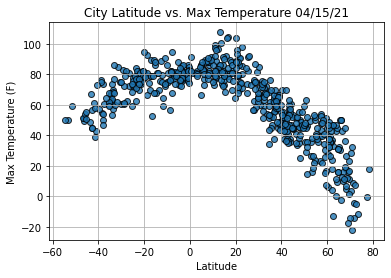

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

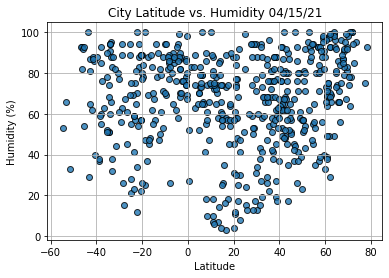

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

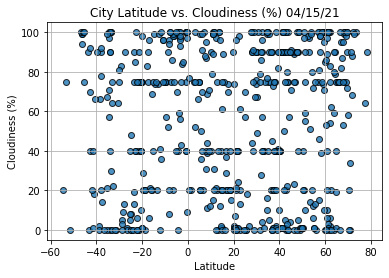

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

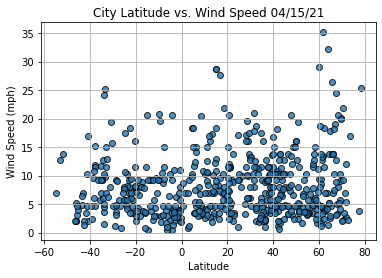

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# To determine how strong the relationship is between the fitted 
# line and the data, we find the correlation coefficient, or 
# r-value. A correlation coefficient close to 1 shows a strong 
# positive correlation, whereas close to –1 shows a strong 
# negative correlation. A correlation coefficient close to zero 
# is no correlation.

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Najran,SA,2021-04-15 16:29:55,17.4924,44.1277,89.60,18,74,6.91
1,Verkh-Usugli,RU,2021-04-15 16:29:56,52.7000,115.1667,26.42,62,97,4.56
2,Saint-Philippe,RE,2021-04-15 16:29:56,-21.3585,55.7679,77.00,83,0,3.44
3,Puttur,IN,2021-04-15 16:29:56,12.7667,75.2167,82.40,74,20,4.61
4,Port Alfred,ZA,2021-04-15 16:29:56,-33.5906,26.8910,69.85,66,100,25.26
...,...,...,...,...,...,...,...,...,...
551,Chiman,PK,2021-04-15 16:32:46,32.5463,73.8138,75.20,41,40,4.29
552,Taldan,RU,2021-04-15 16:32:47,53.6667,124.8000,18.68,91,99,3.53
553,Fort Nelson,CA,2021-04-15 16:30:00,58.8053,-122.7002,41.00,56,75,5.75
554,Isangel,VU,2021-04-15 16:32:47,-19.5500,169.2667,78.37,84,29,3.85


In [22]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame. 
# The loc method accesses a group of rows and columns 
# in the current DataFrame by an index, labels, or a 
# Boolean array. The syntax to get a specific row 
# from a current DataFrame is row = df.loc[row_index].

In [23]:
index13 = city_data_df.loc[13]

In [24]:
index13

City                  Pietarsaari
Country                        FI
Date          2021-04-15 16:29:59
Lat                         63.65
Lng                       22.6833
Max Temp                     43.0
Humidity                       49
Cloudiness                      0
Wind Speed                   6.91
Name: 13, dtype: object

In [25]:
# We can also filter a DataFrame based on a value 
# of a row. For instance, if we wanted to get all 
# Northern Hemisphere latitudes, for latitudes 
# greater than or equal to 0, we can filter the 
# city_data_df DataFrame using the code 
# city_data_df["Lat"] >= 0. Executing this code 
# will return either "True" or "False" for all 
# the rows that meet these criteria.

city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
551     True
552     True
553     True
554    False
555    False
Name: Lat, Length: 556, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Najran,SA,2021-04-15 16:29:55,17.4924,44.1277,89.60,18,74,6.91
1,Verkh-Usugli,RU,2021-04-15 16:29:56,52.7000,115.1667,26.42,62,97,4.56
3,Puttur,IN,2021-04-15 16:29:56,12.7667,75.2167,82.40,74,20,4.61
5,Jamestown,US,2021-04-15 16:29:57,42.0970,-79.2353,42.01,65,90,10.36
8,Chaumont,FR,2021-04-15 16:29:58,48.1167,5.1333,50.00,41,90,3.00


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Najran,SA,2021-04-15 16:29:55,17.4924,44.1277,89.60,18,74,6.91
1,Verkh-Usugli,RU,2021-04-15 16:29:56,52.7000,115.1667,26.42,62,97,4.56
3,Puttur,IN,2021-04-15 16:29:56,12.7667,75.2167,82.40,74,20,4.61
5,Jamestown,US,2021-04-15 16:29:57,42.0970,-79.2353,42.01,65,90,10.36
8,Chaumont,FR,2021-04-15 16:29:58,48.1167,5.1333,50.00,41,90,3.00
...,...,...,...,...,...,...,...,...,...
548,Huayang,CN,2021-04-15 16:32:45,34.4155,109.9939,43.30,26,77,2.62
550,Igarka,RU,2021-04-15 16:32:46,67.4667,86.5833,11.43,89,87,24.43
551,Chiman,PK,2021-04-15 16:32:46,32.5463,73.8138,75.20,41,40,4.29
552,Taldan,RU,2021-04-15 16:32:47,53.6667,124.8000,18.68,91,99,3.53


In [29]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Saint-Philippe,RE,2021-04-15 16:29:56,-21.3585,55.7679,77.00,83,0,3.44
4,Port Alfred,ZA,2021-04-15 16:29:56,-33.5906,26.8910,69.85,66,100,25.26
6,Rikitea,PF,2021-04-15 16:29:57,-23.1203,-134.9692,77.50,75,85,7.96
7,Punta Arenas,CL,2021-04-15 16:29:57,-53.1500,-70.9167,50.00,66,75,12.66
11,Amahai,ID,2021-04-15 16:29:58,-3.3333,128.9167,82.00,87,97,2.04
...,...,...,...,...,...,...,...,...,...
542,El Alto,PE,2021-04-15 16:32:43,-4.2714,-81.2147,84.20,58,0,20.71
546,Marovoay,MG,2021-04-15 16:32:44,-16.1000,46.6333,78.80,89,20,3.69
549,Calama,CL,2021-04-15 16:32:45,-22.4667,-68.9333,73.40,12,0,3.44
554,Isangel,VU,2021-04-15 16:32:47,-19.5500,169.2667,78.37,84,29,3.85


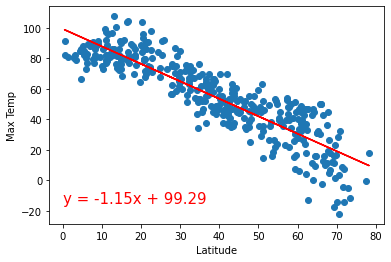

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-15))

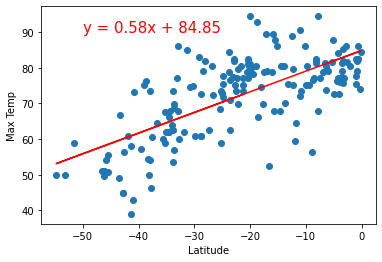

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

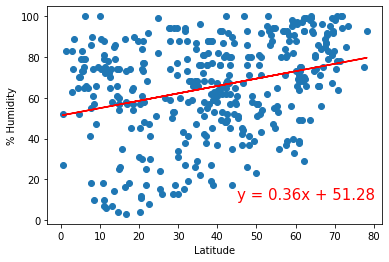

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

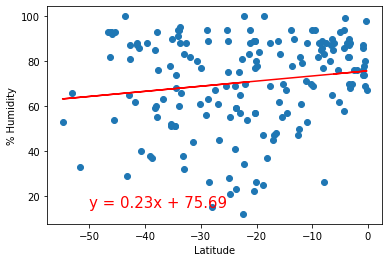

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

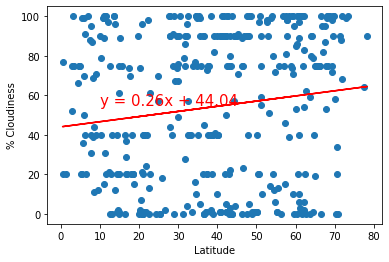

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

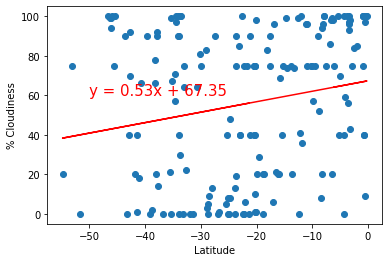

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

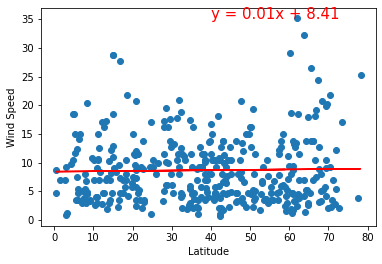

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

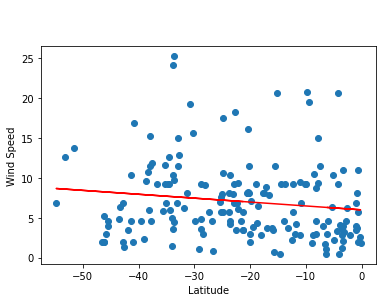

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,30))

In [38]:
# # TROUBLE-SHOOTING MISSING TITLES
# 
# # Linear regression on the Southern Hemisphere
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Wind Speed"]
# # Call the function.
# plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere', 'Wind Speed',(-30,30))

In [39]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [40]:
# LOC METHOD ON DATAFRAME
# 
# Next, filter the maximum temperature column in 
# the city_data_df DataFrame using logical operators 
# to create a new DataFrame with the cities that meet 
# the customer's criteria.
# 
# Recall that you use the loc[] method on the current 
# DataFrame to create a new DataFrame from a current 
# DataFrame. Inside the brackets, add the conditional 
# filter.

In [41]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Najran,SA,2021-04-15 16:29:55,17.4924,44.1277,89.60,18,74,6.91
2,Saint-Philippe,RE,2021-04-15 16:29:56,-21.3585,55.7679,77.00,83,0,3.44
3,Puttur,IN,2021-04-15 16:29:56,12.7667,75.2167,82.40,74,20,4.61
6,Rikitea,PF,2021-04-15 16:29:57,-23.1203,-134.9692,77.50,75,85,7.96
11,Amahai,ID,2021-04-15 16:29:58,-3.3333,128.9167,82.00,87,97,2.04
20,Pathein,MM,2021-04-15 16:25:39,16.7833,94.7333,80.62,73,37,7.31
21,Havelock,US,2021-04-15 16:28:07,34.8791,-76.9013,75.99,68,75,11.50
26,Georgetown,MY,2021-04-15 16:29:52,5.4112,100.3354,84.99,83,20,3.44
31,Hithadhoo,MV,2021-04-15 16:30:05,-0.6000,73.0833,82.54,69,9,1.95
39,Mabaruma,GY,2021-04-15 16:30:08,8.2000,-59.7833,86.13,61,69,6.76


In [42]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.isnull().sum()

City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [45]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.count()

City          174
Country       174
Date          174
Lat           174
Lng           174
Max Temp      174
Humidity      174
Cloudiness    174
Wind Speed    174
dtype: int64

In [46]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.notnull().sum()

City          174
Country       174
Date          174
Lat           174
Lng           174
Max Temp      174
Humidity      174
Cloudiness    174
Wind Speed    174
dtype: int64

In [47]:
preferred_cities_df.count()

City          174
Country       174
Date          174
Lat           174
Lng           174
Max Temp      174
Humidity      174
Cloudiness    174
Wind Speed    174
dtype: int64

In [48]:
# Consider the following guidance:
# 
# Depending on the time of year and the seasons, 
# you might have to adjust the minimum and maximum 
# temperature to get enough cities.
# 
# It is a good idea to keep the number of cities 
# to fewer than 200 to make it easier to plot the 
# markers on the heatmap.
# 
# If you have some rows with null values, you'll 
# need to drop them using the dropna() method at 
# the end of your filtering statement when you are 
# creating the new DataFrame.

In [52]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Najran,SA,89.60,17.4924,44.1277,
2,Saint-Philippe,RE,77.00,-21.3585,55.7679,
3,Puttur,IN,82.40,12.7667,75.2167,
6,Rikitea,PF,77.50,-23.1203,-134.9692,
11,Amahai,ID,82.00,-3.3333,128.9167,
20,Pathein,MM,80.62,16.7833,94.7333,
21,Havelock,US,75.99,34.8791,-76.9013,
26,Georgetown,MY,84.99,5.4112,100.3354,
31,Hithadhoo,MV,82.54,-0.6000,73.0833,
39,Mabaruma,GY,86.13,8.2000,-59.7833,


In [54]:
# Import the API key.
from config import g_key

In [56]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [57]:
# How would you retrieve the name of the first hotel in the results dictionary?
# 
# hotels["results"][0]["name"]